<a href="https://colab.research.google.com/github/IvanTrujillo7/Entrega-final-Data-Science-III/blob/main/PROYECTO_FINAL_DATA_SCIENCE_III_CRISTIAN_IV%C3%81N_TRUJILLO_TORRES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de sentimientos en comida Vegetariana y No Vegetariana

**Entregable Final (27/09/2025) - Data Science III: NLP y Deep Learning- CODERHOUSE**

*Cristian Iván Trujillo Torres*


# 1. INTRODUCCIÓN

### **Objetivo del proyecto**

Descubrir y analizar las preferencias y percepciones de los consumidores asiáticos a detalle, frente a la comida vegetariana y no vegetariana a partir de reseñas de restaurantes, empleando técnicas de procesamiento de lenguaje natural (NLP) y redes neuronales para identificar patrones cuantitativos y cualitativos en los pedidos y opiniones.


### **Contexto del análisis**

Con el propósito de llevar a cabo una práctica de procesamiento de lenguaje natural (NLP) y el uso de redes neuronales en el Curso 3 de Data Science de la plataforma CODERHOUSE, se diseñó un proyecto que reúne características de escalabilidad, desafío técnico y un objetivo alineado con intereses personales.

El enfoque elegido consiste en analizar el gusto gastronómico popular mediante la comparación entre platos vegetarianos y no vegetarianos, explorando las reseñas y calificaciones de clientes en restaurantes de la población asiática. De esta manera, se busca identificar patrones de preferencia, cuantificar la experiencia de los comensales y aplicar técnicas avanzadas de NLP y aprendizaje profundo en un contexto real y significativo.

### **Fuente principal del Dataset**

Este conjunto de datos consta de reseñas recopiladas de restaurantes en una plataforma coreana de entrega a domicilio que ejecuta un evento de reseñas. Se recopilaron un total de 128,668 reseñas de 136 restaurantes mediante el rastreo de reseñas con la biblioteca Selenium en Python. El conjunto de datos denominado Korean Reviews.csv proporciona datos de reseñas sin traducir al inglés, mientras que el conjunto de datos denominado English Reviews.csv proporciona datos de reseñas traducidos al inglés. Los 136 restaurantes seleccionados ejecutan eventos de reseñas que exigen a los clientes escribir reseñas.

### **Estructura de los datos**

El dataset está dispuesto por un archivo csv que contiene los registros con las siguientes dimensiones:

* UserID: identificador anónimo del usuario que dejó la reseña (ej: wo**). Generalmente enmascarado para privacidad.

* Menu: el/los platos pedidos.
Ejemplo: "[BEST] Spicy pork belly stir-fried meal/1 (composition...)".
Aquí se incluye nombre del plato, número de porciones, y a veces notas como [BEST].

* Review: texto de la reseña del cliente. Es la parte cualitativa en lenguaje natural.

* Total: calificación global (entera de 1 a 5).

* Taste: calificación específica al sabor (1–5).

* Quantity: calificación de la cantidad/porción (1–5).

* Delivery: calificación del servicio de entrega (1–5).

* Date: fecha y hora en que el cliente dejó la reseña.

* HasPicture: si la reseña tiene foto (1 = sí, 0 = no).

* BiasFree: indicador de si la reseña es considerada libre de sesgo.

*     1 → se cree que la reseña es genuina.

+     0 → puede haber sesgo (ej: promociones, eventos de reseñas, etc.).

* RestaurantID: identificador del restaurante en la plataforma. Te permite agrupar reseñas por restaurante.

### **Preguntas Clave**

En el marco del análisis de reseñas gastronómicas, surge la necesidad de comprender cómo se configuran las preferencias de los comensales frente a la comida vegetariana y no vegetariana. Más allá de medir únicamente la satisfacción global, resulta relevante observar la proporción de pedidos, las palabras que los clientes utilizan al describir su experiencia, así como las diferencias entre restaurantes y niveles de puntuación.

*   ¿Que proporción tienen las ordenes vegetarianas con respecto al total?


*   ¿Que palabras en las reseñas caracterizan a los platos vegetarianos y a los no vegetarianos independientemente de su polaridad de sentimiento?


*   ¿Que porcentaje de restaurantes recibe más ordenes de comida vegetariana que no vegetariana?


*   ¿Que distribución y estructura tienen las reseñas de los clientes con mayor y menor puntuación?





Estas preguntas permiten abordar el problema desde un enfoque cuantitativo y cualitativo, integrando técnicas de procesamiento de lenguaje natural y análisis estadístico para obtener conclusiones sólidas sobre el comportamiento y la percepción de los consumidores.

# 2. Librerias utilizadas

### **Instalación de librerias**

In [1]:
!pip install gdown

In [2]:
pip install deep_translator

###  **Importación de librerias**

In [3]:
# Manejo de datos y utilidades

import pandas as pd          # Manipulación de DataFrames
import numpy as np           # Operaciones numéricas
import re                    # Expresiones regulares
from collections import Counter  # Conteo de frecuencias

# Descarga y procesamiento de texto

import gdown                 # Descarga de archivos desde Google Drive
import spacy                 # NLP avanzado (lemmatización, POS, etc.)
import nltk                  # Procesamiento de lenguaje natural clásico
from nltk.sentiment.vader import SentimentIntensityAnalyzer  # Análisis de sentimientos (VADER)

# Visualización

import matplotlib.pyplot as plt   # Gráficos básicos
import seaborn as sns             # Gráficos avanzados y estadísticos
from wordcloud import WordCloud, STOPWORDS  # Nubes de palab

# Machine Learning clásico

from sklearn.feature_extraction.text import TfidfVectorizer  # Representación TF-IDF
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV  # División y búsqueda de hiperparámetros
from sklearn.linear_model import LogisticRegression          # Clasificador lineal
from sklearn.svm import LinearSVC                            # SVM lineal
from sklearn.ensemble import RandomForestClassifier, StackingClassifier  # Ensambles
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # Métricas de evaluación
from sklearn.pipeline import Pipeline                        # Creación de pipelines
from sklearn.preprocessing import LabelEncoder               # Codificación de etiquetas
from sklearn.utils.class_weight import compute_class_weight  # Balanceo de clases
from xgboost import XGBClassifier                            # Modelo XGBoost
from imblearn.over_sampling import RandomOverSampler         # Oversampling para clases desbalanceadas

# Deep Learning (TensorFlow/Keras)

import tensorflow as tf
from tensorflow.keras.models import Sequential              # Modelos secuenciales
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout  # Capas de redes neuronales
from tensorflow.keras.preprocessing.text import Tokenizer   # Tokenización de texto
from tensorflow.keras.preprocessing.sequence import pad_sequences  # Secuencias uniformes


### **Recursos Adicionales**

In [4]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.7/400.7 MB 1.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [5]:
from IPython.display import Audio

def beep():
    sr = 80000  # frecuencia de muestreo
    t = np.linspace(0, 0.2, int(0.8*sr), False)  # 0.8 segundos
    tone = np.sin(5*np.pi*10000*t)  # tono de 10000 Hz (agudo)
    return Audio(tone, rate=sr, autoplay=True)

In [6]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# 3. Análisis Exploratorio

### **Obtención del dataset**




In [7]:
link = 'https://drive.google.com/file/d/1fWpbbXsq4WeTNAAkGfy6xs22h5LVZhyS/view?usp=drive_link'
file_id = link.split('/')[-2]
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'reviews.csv', quiet=False)
df = pd.read_csv('reviews.csv')

Downloading...
From: https://drive.google.com/uc?id=1fWpbbXsq4WeTNAAkGfy6xs22h5LVZhyS
To: /content/reviews.csv
100%|██████████| 8.48M/8.48M [00:00<00:00, 90.5MB/s]
/tmp/ipython-input-2366719942.py:4: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('reviews.csv')


### **Data Wrangling**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128668 entries, 0 to 128667
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   UserID        128668 non-null  object 
 1   Menu          17464 non-null   object 
 2   Review        18199 non-null   object 
 3   Total         128668 non-null  int64  
 4   Taste         128668 non-null  int64  
 5   Quantity      128668 non-null  int64  
 6   Delivery      122795 non-null  float64
 7   Date          128668 non-null  object 
 8   HasPicture    128668 non-null  int64  
 9   BiasFree      128668 non-null  int64  
 10  RestaurantID  128668 non-null  int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 10.8+ MB


In [9]:
df.describe()

,Total,Taste,Quantity,Delivery,HasPicture,BiasFree,RestaurantID
count,128668.000000,128668.000000,128668.000000,122795.000000,128668.000000,128668.000000,1.286680e+05
mean,4.858100,4.804093,4.811515,4.841109,0.733477,0.312277,4.609909e+05
std,0.552688,0.722843,0.704703,0.595183,0.442143,0.551418,2.924135e+05
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.779000e+03
25%,5.000000,5.000000,5.000000,5.000000,0.000000,0.000000,2.977290e+05
50%,5.000000,5.000000,5.000000,5.000000,1.000000,0.000000,3.485420e+05
75%,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,5.101140e+05
max,5.000000,5.000000,5.000000,5.000000,1.000000,3.000000,1.203472e+06


Se puede observar como las calificaciones han sido abrumadoramente positivas, esto se analizará posteriormente comparando la reseña.

In [10]:
df.isnull().sum()

,0
UserID,0
Menu,111204
Review,110469
Total,0
Taste,0
Quantity,0
Delivery,5873
Date,0
HasPicture,0
BiasFree,0


Ante esta gran cantidad de valores nulos en las columnas de mayor interés se procede a estudiar si puede ser un error en la estructura de los datos.

In [11]:
df.tail(10)

,UserID,Menu,Review,Total,Taste,Quantity,Delivery,Date,HasPicture,BiasFree,RestaurantID
128658,손님,NaN,NaN,4,0,0,NaN,2014-06-05 22:33,0,3,9444
128659,손님,NaN,NaN,4,0,0,NaN,2014-05-25 23:51,0,3,9444
128660,손님,NaN,NaN,5,0,0,NaN,2014-04-28 11:05,0,3,9444
128661,손님,NaN,NaN,5,0,0,NaN,2014-04-15 23:22,0,3,9444
128662,손님,NaN,NaN,5,0,0,NaN,2014-02-11 20:29,0,3,9444
128663,손님,NaN,NaN,1,0,0,NaN,2014-01-20 21:51,0,3,9444
128664,손님,NaN,NaN,5,0,0,NaN,2014-01-12 14:59,0,3,9444
128665,손님,NaN,NaN,4,0,0,NaN,2014-01-11 21:05,0,3,9444
128666,손님,NaN,NaN,4,0,0,NaN,2014-01-10 23:13,0,3,9444
128667,손님,NaN,NaN,5,0,0,NaN,2013-12-09 22:57,0,3,9444


Es necesarió eliminar todos los valores nulos lo que dejará un dataset significativamente reducido pero aún con dimensiones para un ejercicio academico.

In [12]:
df.dropna(inplace=True)

Ahora se procede a eliminar las columnas que no se utilizarán en este análisis.

In [13]:
df.columns

Index(['UserID', 'Menu', 'Review', 'Total', 'Taste', 'Quantity', 'Delivery',
       'Date', 'HasPicture', 'BiasFree', 'RestaurantID'],
      dtype='object')

In [14]:
columnas_eliminar = ['UserID', 'Date', 'HasPicture', 'Taste', 'Quantity', 'Delivery']
df.drop(columns=columnas_eliminar, inplace=True)

In [15]:
df.head()

,Menu,Review,Total,BiasFree,RestaurantID
0,[2 ~ 3 servings] Zagle is formal/1 (compositio...,I haven't been satisfied with the recent jjagl...,5,0,1001304
1,[BEST] Spicy pork belly stir -fried meal/1 (co...,The amount is generous and delicious! I really...,5,1,1001304
2,[1 serving] Jagle + lunch box set/1 (Select (R...,I gave you the service and ate well,5,0,1001304
3,[1 serving] Zagle is formal/1 (composition (de...,"I ate it deliciously, so it touched it",5,0,1001304
4,[2 ~ 3 servings] Zagle is formal/1 (compositio...,The food is delicious.,5,0,1001304


Ahora se procede a examinar si las columnas no tienen errores o valores que no corresponden.

In [16]:
df['Total'].unique()

array([5, 4, 3, 1, 2])

In [17]:
df['RestaurantID'].unique()

array([1001304, 1003294, 1004649, 1006338, 1012326, 1012359, 1013809,
       1017292, 1018355, 1025049, 1026492, 1032674, 1033507, 1034082,
       1044041, 1045868, 1047598, 1061827, 1082077, 1095057, 1096420,
       1110343, 1110920, 1119877, 1120783, 1126859, 1130487, 1132974])

Normalizamos los textos

In [18]:
df['Review'] = df['Review'].str.lower()
df['Menu'] = df['Menu'].str.lower()

Ajustamos los tipos de datos

In [19]:
df["Review"] = df["Review"].astype("string")
df["Menu"] = df["Menu"].astype("string")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16462 entries, 0 to 18198
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Menu          16462 non-null  string
 1   Review        16462 non-null  string
 2   Total         16462 non-null  int64 
 3   BiasFree      16462 non-null  int64 
 4   RestaurantID  16462 non-null  int64 
dtypes: int64(3), string(2)
memory usage: 771.7 KB


### **Preparación de la columna non_veg**

Para continuar el análisis y cumplir con el objetivo es necesario realizar una transformación de la columna menú en no_vegetariano conteniendo valores binarios según los ingredientes que tiene.

In [20]:
non_veg_keywords = [
    # Carnes rojas / genéricos
    "beef","steak","rib","sirloin","tenderloin","brisket","short rib",
    "galbi","bulgogi","sogogi","gogi","ox","cow","lamb","mutton","goat","venison",

    # Aves
    "chicken","dak","dakgalbi","samgyetang","drumstick", "eall", "wing","breast","duck","turkey","pheasant","quail",

    # Cerdo
    "pork","dwaeji","samgyeopsal","bacon","ham","sausage","chop","ribs","cutlet","tonkatsu",

    # Pescados
    "fish","salmon","tuna","mackerel","cod","pollock","anchovy","herring","trout","sardine","halibut","snapper", "sushi",

    # Mariscos
    "shrimp","prawn","lobster","crab","clam","mussel","oyster","scallop","squid","octopus","cuttlefish","seafood",
    "haemul","nakji","ojingeo","hoe",

    # Procesados / platos comunes que implican carne
    "burger","patty","meatball","hotdog","pepperoni","salami","prosciutto","jerky","pastrami","gyro","katsu","gyoza", "zagle",  "zagle", "shawarma", "doner kebab", "gyros", "shish kebab",
    "adana kebab", "kofta", "souvlaki",

    # Asian & Indian
    "biryani chicken", "biryani lamb", "chicken curry", "lamb curry",
    "tandoori chicken", "beef curry", "tagine lamb",

    # Meat dishes
    "estofado de res", "beef stew", "carne asada", "grilled beef",
    "alitas de pollo", "chicken wings", "costillas bbq", "bbq ribs",
    "chuleta de cerdo", "pork chop", "filete de res", "beef steak",
    "lomo de cerdo", "pork loin",

    # Processed meats
    "chorizo", "sausage", "salami", "jamon serrano", "serrano ham",
    "pepperoni", "prosciutto", "bacon", "ham",

    # General meats
    "beef", "pork", "chicken", "lamb", "mutton", "turkey",
    "duck", "fish", "salmon", "tuna", "shrimp", "prawns"
]

# normalizamos a minúsculas por si acaso
non_veg_keywords = [w.lower() for w in non_veg_keywords]


In [21]:
def classify_nonveg(text, keywords=non_veg_keywords):
    """
    Clasifica un menú como no vegetariano (1) o vegetariano (0)
    comparando palabra por palabra contra un diccionario de keywords.
    """
    # Normalizamos a minúsculas y extraemos palabras limpias
    tokens = re.findall(r"\b\w+\b", str(text).lower())
    keywords_clean = [k.strip().lower() for k in keywords]

    # Verificamos si alguna palabra coincide
    return 1 if any(word in tokens for word in keywords_clean) else 0

In [22]:
df["non_veg_flag"] = df["Review"].apply(classify_nonveg)


In [23]:
df["non_veg"] = df["Menu"].apply(classify_nonveg)

Realizamos una división del menú con el que se puede empezar a trabajar sin embargo es necesario validar los resultados obtenidos.

In [24]:
df.head(100000)

,Menu,Review,Total,BiasFree,RestaurantID,non_veg_flag,non_veg
0,[2 ~ 3 servings] zagle is formal/1 (compositio...,i haven't been satisfied with the recent jjagl...,5,0,1001304,0,1
1,[best] spicy pork belly stir -fried meal/1 (co...,the amount is generous and delicious! i really...,5,1,1001304,0,1
2,[1 serving] jagle + lunch box set/1 (select (r...,i gave you the service and ate well,5,0,1001304,0,1
3,[1 serving] zagle is formal/1 (composition (de...,"i ate it deliciously, so it touched it",5,0,1001304,0,1
4,[2 ~ 3 servings] zagle is formal/1 (compositio...,the food is delicious.,5,0,1001304,0,1
...,...,...,...,...,...,...,...
18194,samseon stir -fried champon 1 人/1,the ingredients are good because they are kind...,5,0,1132974,0,0
18195,japchae rice/1 (additional selection (add money)),i did what i said and it was delicious,5,1,1132974,0,0
18196,roasted noodles/1 (additional selection of mul...,"happiness of 10,000 won !!",5,0,1132974,0,0
18197,sweet and sour pork/1 (size selection (小)),it's soft and really delicious.,5,0,1132974,0,1


Creamos dos columnas evaluando si las reseñas contienen terminos asociados a carnes o si en el menú se sirvió un platillo asociado a carnes, ahora concatenaremos esos resultados en una columna final donde:
Si non_veg_flag = 1 y non_veg = 0 entonces non_veg = 1

Esta desición tiene el riesgo de que en la reseña se menciones una carne sin estar en el platillo. Por ejemplo:

*   The food tasted like chicken, it's incredible.

In [25]:
# Caso 1: si ya existe la columna 'non_veg', solo actualizamos las filas con non_veg_flag == 1
if "non_veg" in df.columns:
    df.loc[df["non_veg_flag"] == 1, "non_veg"] = 1

# Caso 2: si NO existe la columna 'non_veg', la creamos copiando non_veg_flag
# (esto asegura que la columna exista; si prefieres crearla vacía, cambia pd.NA por otra cosa)
else:
    df["non_veg"] = df["non_veg_flag"].copy()

# (Opcional) normalizar tipo como entero nullable
df["non_veg"] = df["non_veg"].astype("Int64")


In [26]:
df_cls = df.drop(columns=["non_veg_flag", "Menu"]).copy()

In [27]:
df.drop(columns=["non_veg_flag", "Menu"], inplace = True)

In [28]:
df

,Review,Total,BiasFree,RestaurantID,non_veg
0,i haven't been satisfied with the recent jjagl...,5,0,1001304,1
1,the amount is generous and delicious! i really...,5,1,1001304,1
2,i gave you the service and ate well,5,0,1001304,1
3,"i ate it deliciously, so it touched it",5,0,1001304,1
4,the food is delicious.,5,0,1001304,1
...,...,...,...,...,...
18194,the ingredients are good because they are kind...,5,0,1132974,0
18195,i did what i said and it was delicious,5,1,1132974,0
18196,"happiness of 10,000 won !!",5,0,1132974,0
18197,it's soft and really delicious.,5,0,1132974,1


<Axes: xlabel='non_veg', ylabel='count'>

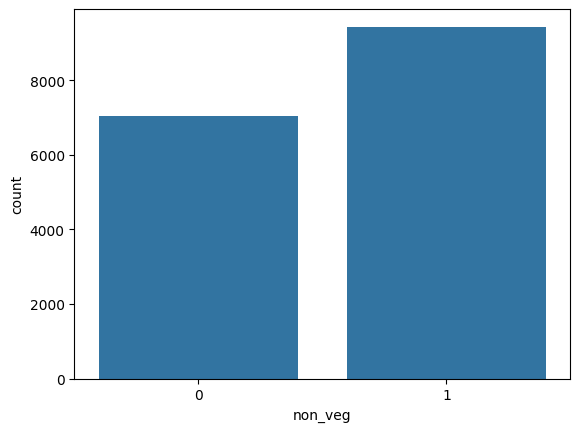

In [29]:
sns.countplot(data=df, x="non_veg")

### **Estructura de las reseñas**

 A continuación veremos unos graficos de la estructura de las reseñas y scaracteristicas utiles para tener en cuenta.

In [30]:
df.columns

Index(['Review', 'Total', 'BiasFree', 'RestaurantID', 'non_veg'], dtype='object')

<Axes: xlabel='Total', ylabel='count'>

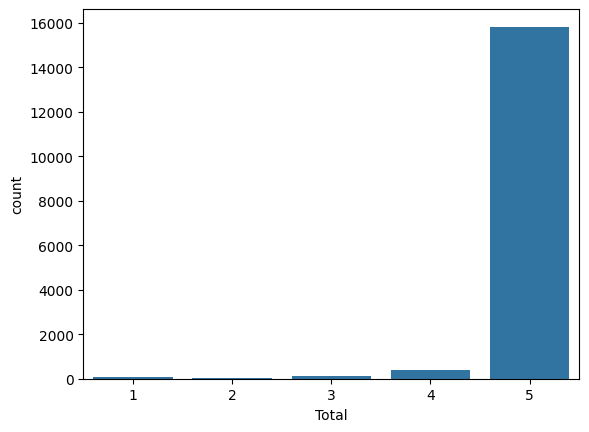

In [31]:
sns.countplot(data=df, x="Total")

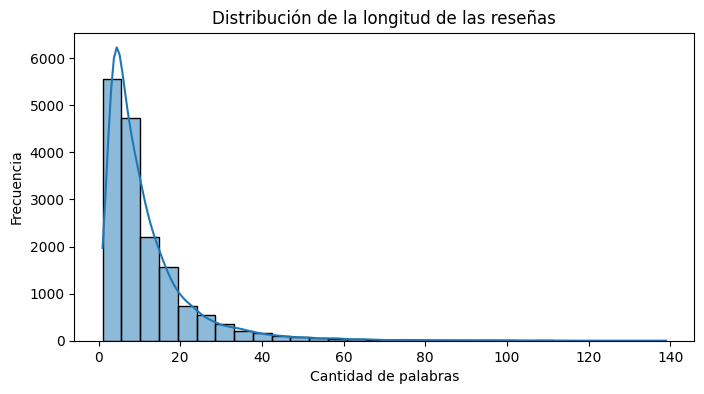

In [32]:
df['review_length'] = df['Review'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(8, 4))
sns.histplot(df['review_length'], bins=30, kde=True)
plt.title('Distribución de la longitud de las reseñas')
plt.xlabel('Cantidad de palabras')
plt.ylabel('Frecuencia')
plt.show()

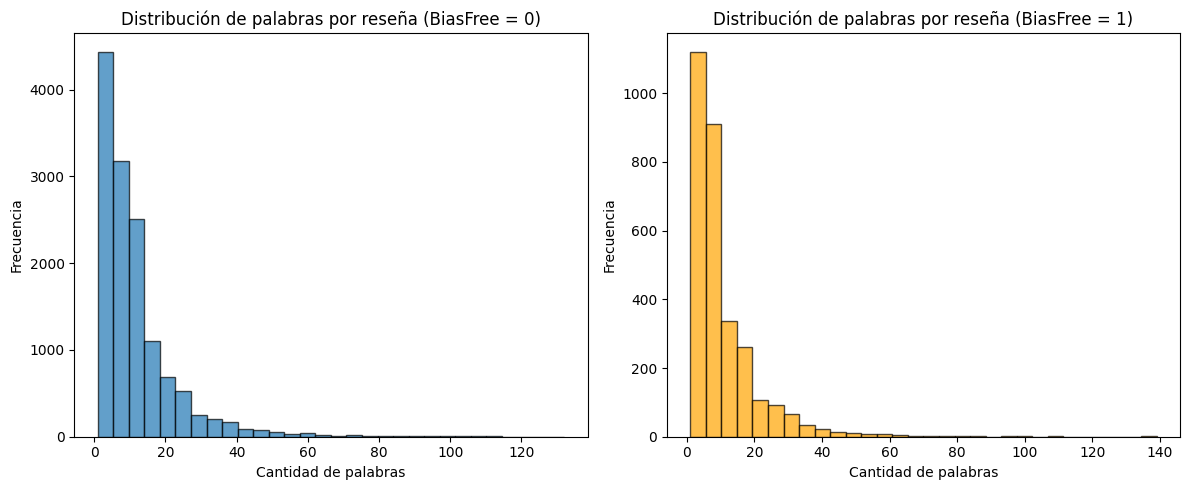

In [33]:
df["word_count"] = df["Review"].apply(lambda x: len(str(x).split()))

# Filtramos por BiasFree = 0 y 1
df_bias0 = df[df["BiasFree"] == 0]
df_bias1 = df[df["BiasFree"] == 1]

# Creamos dos histogramas (uno para cada grupo)
plt.figure(figsize=(12, 5))

# BiasFree = 0
plt.subplot(1, 2, 1)
plt.hist(df_bias0["word_count"], bins=30, edgecolor="black", alpha=0.7)
plt.title("Distribución de palabras por reseña (BiasFree = 0)")
plt.xlabel("Cantidad de palabras")
plt.ylabel("Frecuencia")

# BiasFree = 1
plt.subplot(1, 2, 2)
plt.hist(df_bias1["word_count"], bins=30, edgecolor="black", alpha=0.7, color="orange")
plt.title("Distribución de palabras por reseña (BiasFree = 1)")
plt.xlabel("Cantidad de palabras")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

### **Preguntas e Insights**

In [34]:
df.columns

Index(['Review', 'Total', 'BiasFree', 'RestaurantID', 'non_veg',
       'review_length', 'word_count'],
      dtype='object')

*¿Que proporción tienen las ordenes vegetarianas con respecto al total?*


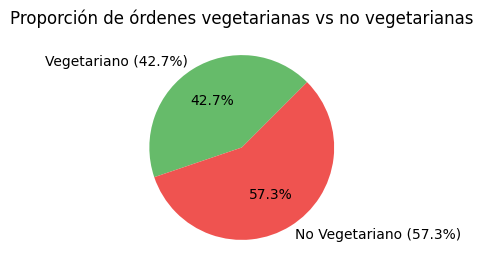

In [35]:
veg_count = (df['non_veg'] == 0).sum()
non_veg_count = (df['non_veg'] == 1).sum()
total = len(df)

veg_prop = veg_count / total * 100
non_veg_prop = non_veg_count / total * 100

# Gráfico
plt.figure(figsize=(3,3))
plt.pie(
    [veg_count, non_veg_count],
    labels=[f"Vegetariano ({veg_prop:.1f}%)", f"No Vegetariano ({non_veg_prop:.1f}%)"],
    autopct='%1.1f%%',
    startangle=45,
    colors=["#66BB6A", "#EF5350"]
)
plt.title("Proporción de órdenes vegetarianas vs no vegetarianas")
plt.show()

La proporción es bastante equitativa debido a los parametros de división, esto es inesperado ya que los restaurantes se encuentran en una cultura no vegetariana.


*¿Que palabras en las reseñas caracterizan a los platos vegetarianos y a los no vegetarianos independientemente de su polaridad de sentimiento?*

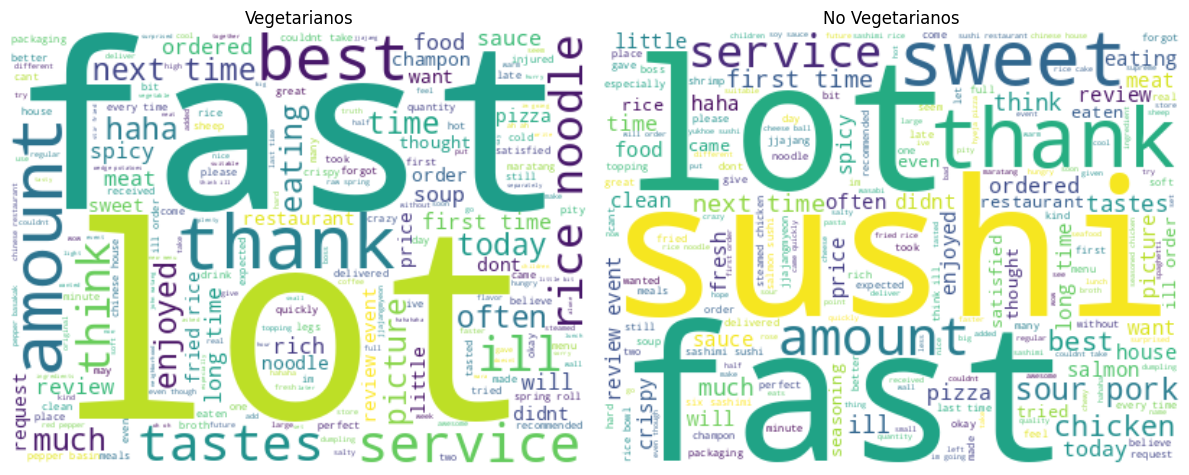

In [36]:
def limpiar_texto(texto):
    texto = texto.lower()  # minúsculas
    texto = re.sub(r'[^a-záéíóúüñ\s]', '', texto)  # quitar caracteres especiales
    return texto

# Separar reviews vegetarianas y no vegetarianas
veg_reviews = df[df['non_veg'] == 0]['Review'].dropna().apply(limpiar_texto)
non_veg_reviews = df[df['non_veg'] == 1]['Review'].dropna().apply(limpiar_texto)

# Combinar todas las reseñas en un solo texto
texto_veg = " ".join(veg_reviews)
texto_non_veg = " ".join(non_veg_reviews)

# Crear nubes de palabras
stopwords = set(STOPWORDS)  # palabras vacías en inglés, se puede agregar español
stopwords.update(["ate", "well", "delicious", "good", "delivery", "eat", "deliciously", "taste", "always", "meal", "really"])  # opcional, palabras comunes irrelevantes

nube_veg = WordCloud(width=400, height=300, background_color='white',
                      stopwords=stopwords).generate(texto_veg)

nube_non_veg = WordCloud(width=400, height=300, background_color='white',
                          stopwords=stopwords).generate(texto_non_veg)

# Mostrar nubes lado a lado
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(nube_veg, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title("Vegetarianos")

axs[1].imshow(nube_non_veg, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title("No Vegetarianos")

plt.tight_layout()
plt.show()


Los graficos presenta una clara similitud en los terminos más usados para dirijirse hacia los platillos en cuanto a la calidad del cervicio, por otro lado destacan por parte de los platos vegetarianos palabras como:

*   noodle
*   soup
*   rice

Por otro lado las reseñas no vegetarianas muestran diversidad en sus platos enviados como:

*   sushi
*   pork
*   chicken






*¿Que porcentaje de restaurantes recibe más ordenes de comida vegetariana que no vegetariana?*

In [37]:
df_cls.columns

Index(['Review', 'Total', 'BiasFree', 'RestaurantID', 'non_veg'], dtype='object')

In [38]:
# Contar órdenes vegetarianas y no vegetarianas por restaurante
conteo = df_cls.groupby('RestaurantID')['non_veg'].value_counts().unstack(fill_value=0)

# Renombrar columnas por claridad
conteo.columns = ['Vegetarianas', 'NoVegetarianas']

# Restaurantes donde las órdenes vegetarianas > no vegetarianas
restaurantes_mas_veg = conteo[conteo['Vegetarianas'] > conteo['NoVegetarianas']]

# Calcular porcentaje
porcentaje = (len(restaurantes_mas_veg) / len(conteo)) * 100

print(f"Porcentaje de restaurantes con más órdenes vegetarianas que no vegetarianas: {porcentaje:.2f}%")


Porcentaje de restaurantes con más órdenes vegetarianas que no vegetarianas: 46.43%


In [39]:
df_cls['RestaurantID'].unique()

array([1001304, 1003294, 1004649, 1006338, 1012326, 1012359, 1013809,
       1017292, 1018355, 1025049, 1026492, 1032674, 1033507, 1034082,
       1044041, 1045868, 1047598, 1061827, 1082077, 1095057, 1096420,
       1110343, 1110920, 1119877, 1120783, 1126859, 1130487, 1132974])

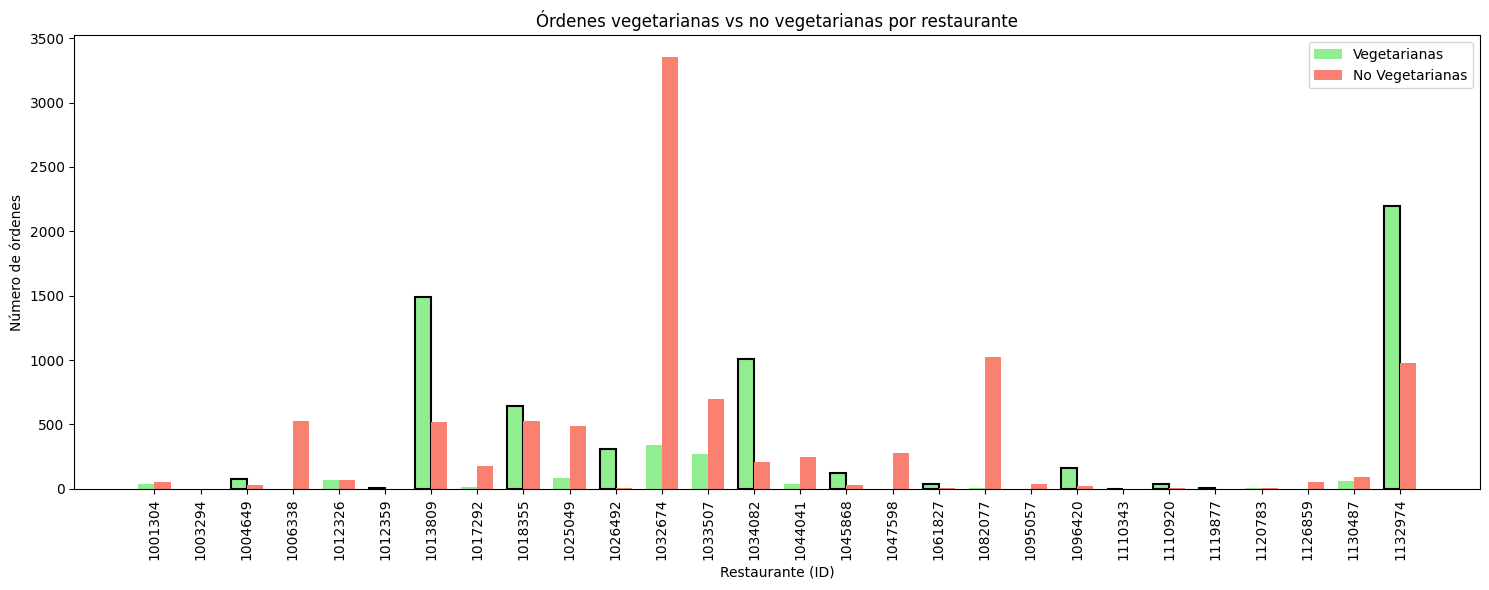

In [40]:
colores = ['green' if v > nv else 'gray' for v, nv in zip(conteo['Vegetarianas'], conteo['NoVegetarianas'])]

# Posiciones de las barras
x = np.arange(len(conteo))
width = 0.35  # ancho de las barras

fig, ax = plt.subplots(figsize=(15,6))

# Barras vegetarianas
ax.bar(x - width/2, conteo['Vegetarianas'], width, label='Vegetarianas', color='lightgreen')

# Barras no vegetarianas
ax.bar(x + width/2, conteo['NoVegetarianas'], width, label='No Vegetarianas', color='salmon')

# Marcar restaurantes con más vegetarianas con borde negro
for i, (v, nv) in enumerate(zip(conteo['Vegetarianas'], conteo['NoVegetarianas'])):
    if v > nv:
        ax.patches[i].set_edgecolor('black')
        ax.patches[i].set_linewidth(1.5)

# Etiquetas y leyenda
ax.set_xlabel('Restaurante (ID)')
ax.set_ylabel('Número de órdenes')
ax.set_title('Órdenes vegetarianas vs no vegetarianas por restaurante')
ax.set_xticks(x)
ax.set_xticklabels(conteo.index, rotation=90)
ax.legend()

plt.tight_layout()
plt.show()


Del gráfico se observa que la mayoría de los restaurantes envían más órdenes no vegetarianas que vegetarianas. Solo unos pocos restaurantes, como los identificados por los IDs 1013809, 1034082 y 1132974, tienen un predominio claro de órdenes vegetarianas.

*¿Que distribución y estructura tienen las reseñas de los clientes con mayor y menor puntuación?*

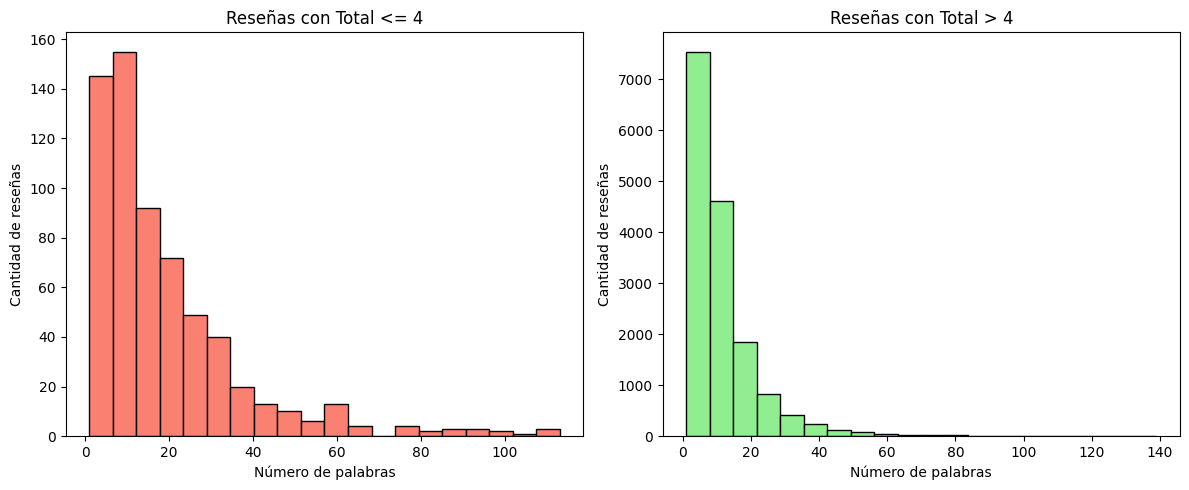

In [41]:
def contar_palabras(texto):
    if pd.isna(texto):
        return 0
    return len(str(texto).split())

# Crear columna con número de palabras por reseña
df['num_palabras'] = df['Review'].apply(contar_palabras)

# Separar reseñas según puntuación
reseñas_bajas = df[df['Total'] <= 4]['num_palabras']
reseñas_altas = df[df['Total'] > 4]['num_palabras']

# Graficar histogramas lado a lado
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].hist(reseñas_bajas, bins=20, color='salmon', edgecolor='black')
axs[0].set_title('Reseñas con Total <= 4')
axs[0].set_xlabel('Número de palabras')
axs[0].set_ylabel('Cantidad de reseñas')

axs[1].hist(reseñas_altas, bins=20, color='lightgreen', edgecolor='black')
axs[1].set_title('Reseñas con Total > 4')
axs[1].set_xlabel('Número de palabras')
axs[1].set_ylabel('Cantidad de reseñas')

plt.tight_layout()
plt.show()


La distribución de palabras por reseña muestra que tanto las reseñas con puntuación baja (≤4) como las altas (>4) tienden a ser cortas, concentrándose la mayoría entre 0 y 20 palabras. Las reseñas positivas son mucho más numerosas y presentan algunos textos más largos, mientras que las negativas son menos frecuentes y su longitud también se extiende de manera moderada.


# 4. Practicas NLP

### **Optimización de Review**

Ahoa veremos paso por paso la optimización de las reseñas su tokenización análisis como NER y otras técnicas usando Spacy

*Tokenización y stop words*

In [42]:
# Cargar modelo en inglés
nlp = spacy.load("en_core_web_lg")

# Tokenización sin puntuación, espacios ni stop words
df["tokens"] = df["Review"].apply(
    lambda x: [token.text.lower() for token in nlp(str(x))
               if not token.is_punct and not token.is_space and not token.is_stop]
)


In [43]:
def clean_tokens(tokens):
    return [t for t in tokens if re.match("^[a-zA-Z]+$", t)]

df["tokens_clean"] = df["tokens"].apply(clean_tokens)


*Lematización*

In [44]:
# Crear columna con lemas a partir de la columna tokens
df["lemmas"] = df["tokens_clean"].apply(
    lambda tokens: [token.lemma_.lower() for doc in [nlp(" ".join(tokens))] for token in doc]
)


Ahoa con la ayuda de la interfaz del data frame de gogle colab verificaremos manualmente errores.

In [45]:
df

,Review,Total,BiasFree,RestaurantID,non_veg,review_length,word_count,num_palabras,tokens,tokens_clean,lemmas
0,i haven't been satisfied with the recent jjagl...,5,0,1001304,1,13,13,13,"[satisfied, recent, jjagle, house, delicious]","[satisfied, recent, jjagle, house, delicious]","[satisfied, recent, jjagle, house, delicious]"
1,the amount is generous and delicious! i really...,5,1,1001304,1,11,11,11,"[generous, delicious, enjoyed, meal]","[generous, delicious, enjoyed, meal]","[generous, delicious, enjoyed, meal]"
2,i gave you the service and ate well,5,0,1001304,1,8,8,8,"[gave, service, ate]","[gave, service, ate]","[give, service, eat]"
3,"i ate it deliciously, so it touched it",5,0,1001304,1,8,8,8,"[ate, deliciously, touched]","[ate, deliciously, touched]","[eat, deliciously, touch]"
4,the food is delicious.,5,0,1001304,1,4,4,4,"[food, delicious]","[food, delicious]","[food, delicious]"
...,...,...,...,...,...,...,...,...,...,...,...
18194,the ingredients are good because they are kind...,5,0,1132974,0,10,10,10,"[ingredients, good, kind, delicious]","[ingredients, good, kind, delicious]","[ingredient, good, kind, delicious]"
18195,i did what i said and it was delicious,5,1,1132974,0,9,9,9,"[said, delicious]","[said, delicious]","[say, delicious]"
18196,"happiness of 10,000 won !!",5,0,1132974,0,5,5,5,"[happiness, 10,000, won]","[happiness, won]","[happiness, win]"
18197,it's soft and really delicious.,5,0,1132974,1,5,5,5,"[soft, delicious]","[soft, delicious]","[soft, delicious]"


Se encontro terminaciones como "ly" para advervios que la primera lematización no transformó

In [46]:
def custom_lemmatize(tokens):
    doc = nlp(" ".join(tokens))
    lemmas = []

    for token in doc:
        lemma = token.lemma_.lower()

        # Si es un adverbio (ADV) y termina en 'ly', recorta
        if token.pos_ == "ADV" and lemma.endswith("ly") and len(lemma) > 4:
            lemma = lemma[:-2]

        lemmas.append(lemma)

    return lemmas

# Aplicar en el dataframe
df["lemmas"] = df["lemmas"].apply(custom_lemmatize)


A continuación se sigue con casos especificos y a eliminar palabras que no aportan al análisis ya que se encuentran incluidos en el contexto.

In [47]:
# Diccionario de reemplazos
replacements = {
    "deliciously": "delicious",
    "happily": "happy",
    "quickly": "quick"
}

# Aplicar reemplazos en la columna "lemmas"
df["lemmas"] = df["lemmas"].apply(
    lambda tokens: [replacements.get(t, t) for t in tokens]
)


Para decidir las palabras que se removeran se creara una visualización de su frecuencia y se escojera a criterio personal(Principalmente las que no aportan polaridad a la reseña)

In [48]:
remove_words = {"meat", "food", "delivery", "restaurant", "order", "eat", "want", "service", "eat", "day", "come", "give", "today"}

df["lemmas"] = df["lemmas"].apply(
    lambda tokens: [t for t in tokens if t not in remove_words]
)


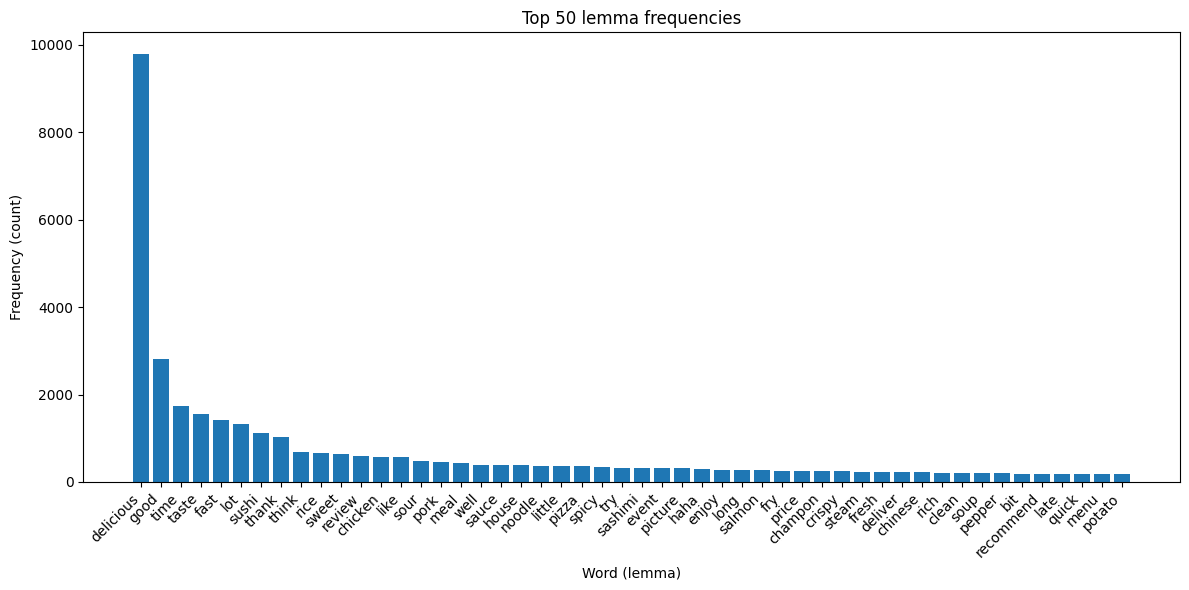

In [49]:
all_lemmas = [lemma for tokens in df["lemmas"].dropna() for lemma in tokens]

# Contar frecuencias
freq = Counter(all_lemmas)

# Pasar a DataFrame y ordenar
freq_df = pd.DataFrame(freq.items(), columns=["word", "count"])
freq_df = freq_df.sort_values("count", ascending=False).reset_index(drop=True)

# Elegir top N palabras más frecuentes
TOP_N = 50
top_df = freq_df.head(TOP_N)

# Gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(top_df["word"], top_df["count"])
plt.xticks(rotation=45, ha="right")
plt.xlabel("Word (lemma)")
plt.ylabel("Frequency (count)")
plt.title(f"Top {TOP_N} lemma frequencies")
plt.tight_layout()
plt.show()

Ahoa un breve análisis de los bigramas por token

In [50]:
# Generar bigramas a partir de cada lista de tokens en lemmas
bigrams = []
for tokens in df["lemmas"].dropna():
    bigrams.extend(list(zip(tokens, tokens[1:])))

# Contar frecuencias
bigram_freq = Counter(bigrams)

# Pasar a DataFrame
bigram_df = pd.DataFrame(bigram_freq.items(), columns=["bigram", "count"])
bigram_df = bigram_df.sort_values("count", ascending=False).reset_index(drop=True)

# Top 10
top_10 = bigram_df.head(10)

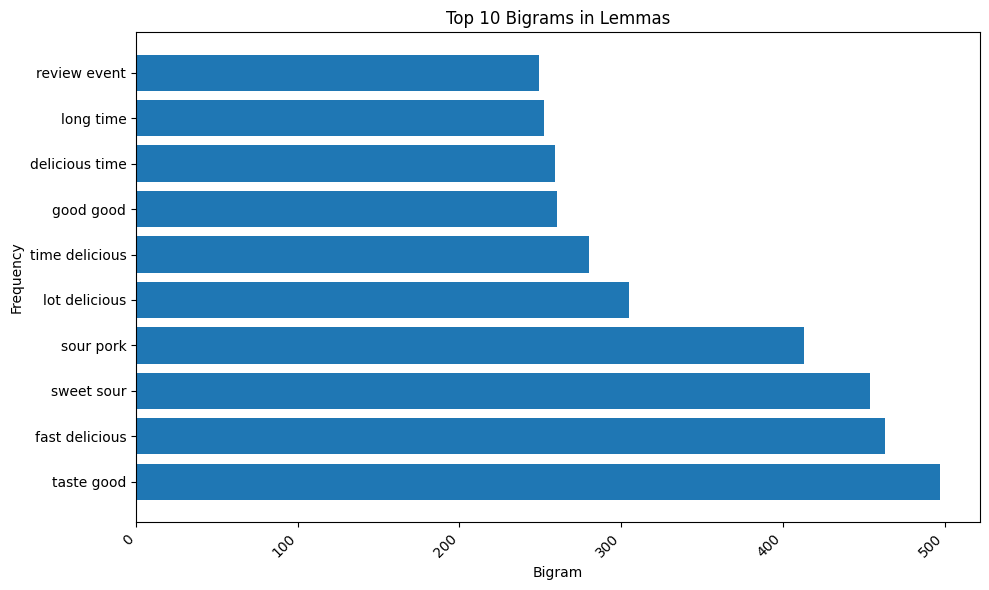

In [51]:
# Gráfico
plt.figure(figsize=(10, 6))
plt.barh([" ".join(bg) for bg in top_10["bigram"]], top_10["count"])
plt.xticks(rotation=45, ha="right")
plt.xlabel("Bigram")
plt.ylabel("Frequency")
plt.title("Top 10 Bigrams in Lemmas")
plt.tight_layout()
plt.show()

Por ultimo un análisis NER y posteriormente se guarda una versión con reducción de dimensionalidad dejando solo las columnas lemma, non_veg y Total

In [52]:
# Cargar modelo spaCy (puedes usar lg o trf si los tienes instalados)
nlp = spacy.load("en_core_web_lg")

# Unir los lemmas en texto para cada reseña
texts = df["lemmas"].dropna().apply(lambda tokens: " ".join(tokens))

# Extraer entidades
entities = []
for doc in nlp.pipe(texts, disable=["tagger", "parser"]):  # más rápido
    entities.extend([ent.text for ent in doc.ents])

# Contar frecuencias
ent_freq = Counter(entities)
ent_df = pd.DataFrame(ent_freq.items(), columns=["entity", "count"])
ent_df = ent_df.sort_values("count", ascending=False).reset_index(drop=True)

# Top 20
top_ent = ent_df.head(20)

/usr/local/lib/python3.12/dist-packages/spacy/pipeline/lemmatizer.py:188: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


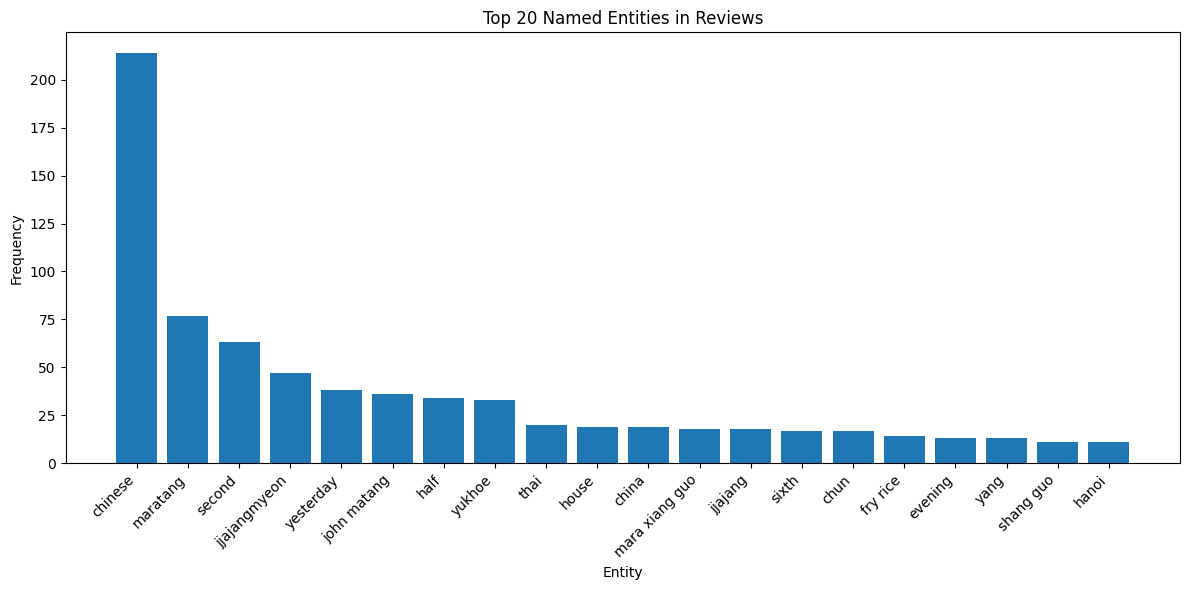

In [53]:
# Gráfico
plt.figure(figsize=(12, 6))
plt.bar(top_ent["entity"], top_ent["count"])
plt.xticks(rotation=45, ha="right")
plt.xlabel("Entity")
plt.ylabel("Frequency")
plt.title("Top 20 Named Entities in Reviews")
plt.tight_layout()
plt.show()

# 5. Análisis de sentimientos

Antes de realizar el análisis de sentimietos es necesario explicar que este Data frame ya tiene una columna con la calificación géneral del plato, la cual se usará como validación del modelo.

In [54]:
#Apartamos el nuevo data frame con solo las columnas a utilizar.
df_opt = df[["lemmas", "non_veg", "Total"]].copy()

In [55]:
df_opt

,lemmas,non_veg,Total
0,"[satisfied, recent, jjagle, house, delicious]",1,5
1,"[generous, delicious, enjoyed, meal]",1,5
2,[],1,5
3,"[delicious, touch]",1,5
4,[delicious],1,5
...,...,...,...
18194,"[ingredient, good, kind, delicious]",0,5
18195,"[say, delicious]",0,5
18196,"[happiness, win]",0,5
18197,"[soft, delicious]",1,5


*Preparamos el la columna Total en polaridad negative, neutral y positive*

1.   Negative = (1-3)
2.   Neutral = (4)
3.   Positive = (5)

In [56]:
def star_to_sentiment(score):
    if score <= 3:
        return "negative"
    elif score == 4:
        return "neutral"
    else:
        return "positive"

df_opt["label"] = df_opt["Total"].apply(star_to_sentiment)


*Realizamos una prueba con Vader*

In [57]:
# ==========================================
# 2. Prepara el texto desde lemmas
# ==========================================
df_opt["text"] = df_opt["lemmas"].apply(lambda x: " ".join(x))

# ==========================================
# 3. Vader Sentiment
# ==========================================

# Eliminar filas con texto vacío o solo espacios
df_opt = df_opt[df_opt["lemmas"].str.strip() != ""]

# Resetear índice
df_opt = df_opt.reset_index(drop=True)

sia = SentimentIntensityAnalyzer()

df_opt["vader_score"] = df_opt["text"].apply(lambda x: sia.polarity_scores(x)["compound"])

# Clasificación simple a etiquetas
def vader_label(score):
    if score >= 0.06:
        return "positive"
    elif score <= -0.04:
        return "negative"
    else:
        return "neutral"

df_opt["vader_label"] = df_opt["vader_score"].apply(vader_label)

# ==========================================
# 4. Resumen de resultados
# ==========================================
print(df_opt["vader_label"].value_counts(normalize=True))
df_opt[["text","vader_score","vader_label"]].head(100000)


vader_label
positive    0.754343
neutral     0.220143
negative    0.025513
Name: proportion, dtype: float64


,text,vader_score,vader_label
0,satisfied recent jjagle house delicious,0.7579,positive
1,generous delicious enjoyed meal,0.8834,positive
2,,0.0000,neutral
3,delicious touch,0.5719,positive
4,delicious,0.5719,positive
...,...,...,...
16457,ingredient good kind delicious,0.8750,positive
16458,say delicious,0.5719,positive
16459,happiness win,0.8126,positive
16460,soft delicious,0.5719,positive


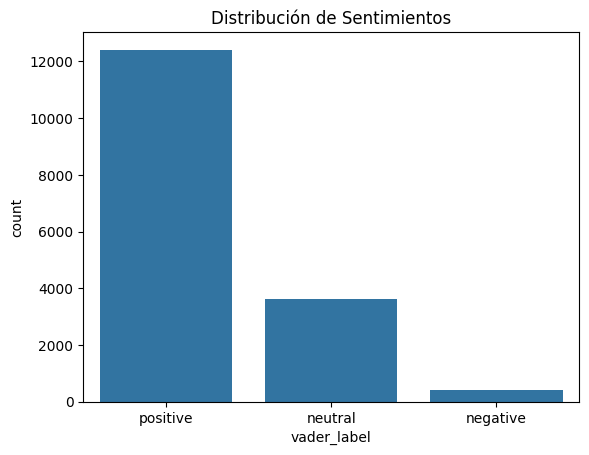

In [58]:
sns.countplot(data=df_opt, x="vader_label")
plt.title("Distribución de Sentimientos")
plt.show()

*Vectorización TF-IDF*

Accuracy (LogReg): 0.952
              precision    recall  f1-score   support

    negative      0.970     0.127     0.225       252
     neutral      0.887     0.942     0.913      2175
    positive      0.972     0.983     0.978      7451

    accuracy                          0.952      9878
   macro avg      0.943     0.684     0.705      9878
weighted avg      0.953     0.952     0.944      9878



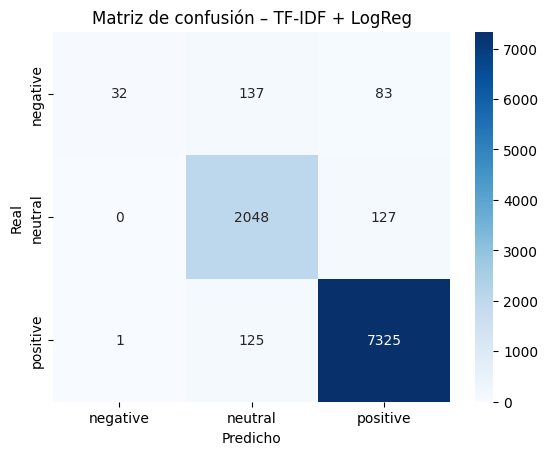

In [59]:
X_train, X_test, y_train, y_test = train_test_split(
    df_opt['text'], df_opt['vader_label'], test_size=0.6, random_state=42, stratify=df_opt['vader_label'])

tfidf = TfidfVectorizer(max_features=50000, ngram_range=(1,2), min_df=2)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf  = tfidf.transform(X_test)

lr = LogisticRegression(max_iter=200, n_jobs=-1)
lr.fit(X_train_tfidf, y_train)
pred_lr = lr.predict(X_test_tfidf)

print("Accuracy (LogReg):", round(accuracy_score(y_test, pred_lr), 3))
print(classification_report(y_test, pred_lr, digits=3))

cm = confusion_matrix(y_test, pred_lr, labels=['negative','neutral','positive'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['negative','neutral','positive'],
            yticklabels=['negative','neutral','positive'])
plt.xlabel('Predicho'); plt.ylabel('Real'); plt.title('Matriz de confusión – TF‑IDF + LogReg')
plt.show()


Tal como se lo esperaba hay un gran desbalance de clases, el modelo si bien tiene un buen Accuracy no presenta un buen comportamiento para los sentimientos negativos.

Se procede a probar nuevos modelos eficaces y rápidos

In [60]:
svm = LinearSVC()
svm.fit(X_train_tfidf, y_train)
pred_svm = svm.predict(X_test_tfidf)

print("Accuracy (SVM):", round(accuracy_score(y_test, pred_svm), 3))
print(classification_report(y_test, pred_svm, digits=3))


Accuracy (SVM): 0.966
              precision    recall  f1-score   support

    negative      0.877     0.397     0.546       252
     neutral      0.914     0.966     0.939      2175
    positive      0.984     0.986     0.985      7451

    accuracy                          0.966      9878
   macro avg      0.925     0.783     0.824      9878
weighted avg      0.966     0.966     0.964      9878



In [61]:
lr = LogisticRegression(max_iter=1000, class_weight="balanced", n_jobs=-1)
lr.fit(X_train_tfidf, y_train)
print(classification_report(y_test, lr.predict(X_test_tfidf), digits=4))


              precision    recall  f1-score   support

    negative     0.4722    0.6071    0.5312       252
     neutral     0.8247    0.9710    0.8919      2175
    positive     0.9951    0.9340    0.9636      7451

    accuracy                         0.9338      9878
   macro avg     0.7640    0.8374    0.7956      9878
weighted avg     0.9443    0.9338    0.9368      9878



In [62]:
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)  # 'negative','neutral','positive' → 0,1,2
y_test_enc  = le.transform(y_test)


In [63]:
# Oversampling
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train_tfidf, y_train_enc)

# Modelo
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric="mlogloss",
    random_state=42,
    n_jobs=-1
)
xgb.fit(X_res, y_res)

# Predicciones
pred = xgb.predict(X_test_tfidf)

# Reporte usando etiquetas originales
print(classification_report(le.inverse_transform(y_test_enc), le.inverse_transform(pred), digits=3))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [23:11:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

    negative      0.694     0.603     0.645       252
     neutral      0.872     0.978     0.922      2175
    positive      0.992     0.961     0.976      7451

    accuracy                          0.956      9878
   macro avg      0.853     0.848     0.848      9878
weighted avg      0.958     0.956     0.956      9878



Estos modelos presentan metricas prometedoras, de modo a que se procede a realizar una prueba rápida de ajuste de hiperpárametros y un ensamble con Stackin classifier.

In [64]:
# ===============================
# Definimos el pipeline base
# ===============================
stack_clf = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", StackingClassifier(
        estimators=[
            ('xgb', XGBClassifier(
                eval_metric='mlogloss',
                use_label_encoder=False,
                random_state=42
            )),
            ('logreg', LogisticRegression(
                class_weight="balanced",
                max_iter=1000,
                random_state=42
            )),
            ('svc', LinearSVC(
                class_weight="balanced",
                random_state=42
            ))
        ],
        final_estimator=LogisticRegression(max_iter=1000, random_state=42),
        n_jobs=-1
    ))
])

# ===============================
# Espacio de hiperparámetros
# ===============================
param_dist = {
    "tfidf__max_features": [3000, 5000, 10000],
    "tfidf__ngram_range": [(1,1), (1,2)],
    "clf__xgb__n_estimators": [100, 200],
    "clf__xgb__max_depth": [3, 5, 7],
    "clf__xgb__learning_rate": [0.05, 0.1, 0.2],
    "clf__svc__C": [0.5, 1, 2],
    "clf__logreg__C": [0.5, 1, 2]
}

# ===============================
# Random Search
# ===============================
search = RandomizedSearchCV(
    stack_clf,
    param_distributions=param_dist,
    n_iter=10,              # número de combinaciones (ajustable)
    cv=3,                   # validación cruzada 3-fold
    scoring="f1_weighted",  # métrica para optimizar
    verbose=2,
    n_jobs=-1,
    random_state=42
)

search.fit(X_train, y_train)

# ===============================
# Resultados
# ===============================
print("Mejores parámetros:", search.best_params_)
print("Mejor score (CV):", search.best_score_)

# Evaluar en test
best_model = search.best_estimator_
y_pred = best_model.predict(X_test)

print("Accuracy (Test):", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Mejores parámetros: {'tfidf__ngram_range': (1, 1), 'tfidf__max_features': 5000, 'clf__xgb__n_estimators': 200, 'clf__xgb__max_depth': 7, 'clf__xgb__learning_rate': 0.2, 'clf__svc__C': 2, 'clf__logreg__C': 1}
Mejor score (CV): 0.9668758253145572
Accuracy (Test): 0.9756023486535736
              precision    recall  f1-score   support

    negative       0.83      0.62      0.71       252
     neutral       0.94      0.97      0.96      2175
    positive       0.99      0.99      0.99      7451

    accuracy                           0.98      9878
   macro avg       0.92      0.86      0.89      9878
weighted avg       0.97      0.98      0.97      9878



In [65]:
beep()

# 6. Deep Learning

En este apartado se hará uso de modelos más complejos como redes neuronales para cumplir con el objetivo propuesto.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Pesos de clase: {0: np.float64(13.064625850340136), 1: np.float64(1.5139929050059124), 2: np.float64(0.44190059825126554)}
Epoch 1/28
181/181 ━━━━━━━━━━━━━━━━━━━━ 55s 275ms/step - accuracy: 0.7278 - loss: 0.8329 - val_accuracy: 0.8376 - val_loss: 0.3555
Epoch 2/28
181/181 ━━━━━━━━━━━━━━━━━━━━ 49s 269ms/step - accuracy: 0.8936 - loss: 0.3401 - val_accuracy: 0.9218 - val_loss: 0.2214
Epoch 3/28
181/181 ━━━━━━━━━━━━━━━━━━━━ 50s 276ms/step - accuracy: 0.9651 - loss: 0.1480 - val_accuracy: 0.9623 - val_loss: 0.1286
Epoch 4/28
181/181 ━━━━━━━━━━━━━━━━━━━━ 51s 281ms/step - accuracy: 0.9864 - loss: 0.0565 - val_accuracy: 0.9668 - val_loss: 0.1313
Epoch 5/28
181/181 ━━━━━━━━━━━━━━━━━━━━ 49s 274ms/step - accuracy: 0.9941 - loss: 0.0322 - val_accuracy: 0.9715 - val_loss: 0.1237
Epoch 6/28
181/181 ━━━━━━━━━━━━━━━━━━━━ 49s 271ms/step - accuracy: 0.9962 - loss: 0.0242 - val_accuracy: 0.9700 - val_loss: 0.1308
Epoch 7/28
181/181 ━━━━━━━━━━━━━━━━━━━━ 51s 282ms/step - accuracy: 0.9963 - loss: 0.0207 - 

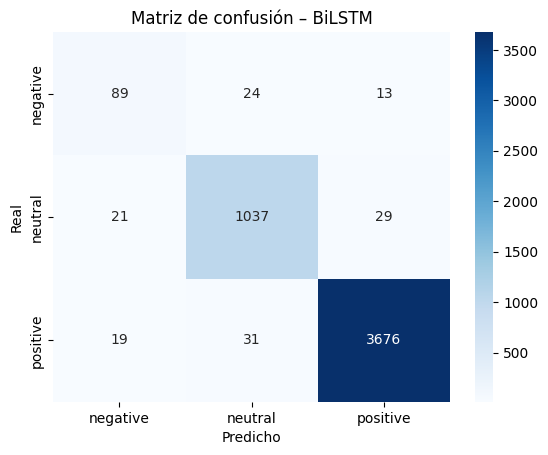

In [66]:
# =====================================
# 1. Datos (X = textos, y = etiquetas)
# =====================================
X = df_opt["text"].values
y = df_opt["vader_label"].values

# Codificar etiquetas
le = LabelEncoder()
y_enc = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc, test_size=0.3, stratify=y_enc, random_state=42
)

# =====================================
# 2. Tokenización + Padding
# =====================================
max_words = 20000   # vocabulario máximo
max_len   = 100     # longitud máxima de secuencia

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq  = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding="post", truncating="post")
X_test_pad  = pad_sequences(X_test_seq, maxlen=max_len, padding="post", truncating="post")

# =====================================
# 3. Modelo Bi-LSTM
# =====================================
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.5),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(len(le.classes_), activation="softmax")
])

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    metrics=["accuracy"]
)

# =====================================
# 4. Ajustar pesos de clase para balance
# =====================================

class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))
print("Pesos de clase:", class_weights)

# =====================================
# 5. Entrenamiento
# =====================================
history = model.fit(
    X_train_pad, y_train,
    validation_data=(X_test_pad, y_test),
    epochs=28,
    batch_size=64,
    class_weight=class_weights,
    verbose=1
)

# =====================================
# 6. Evaluación
# =====================================
y_pred = np.argmax(model.predict(X_test_pad), axis=1)

print("Reporte de clasificación:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de confusión – BiLSTM")
plt.show()


In [67]:
beep()

# 7. Conclusiones

Finalizado este análisis y practica académica de redes neuronales y procesamiento de lenguaje natural quedan las siguientes observaciones e hipotesis en pro de obtener un modelo más optimo que incluso trabaje en tiempo real.

* Se obuvieron insights de valor donde los restaurantes pueden ser beneficiados en la toma de desiciones para mantener y aumentar las opiniones positivas de sus ofertas.

* El modelo entrenado aprendió a reconocer los sentimientos positivo y neutral con éxito, y apesar de tener un desempeño menor en cuanto a las reseñas negativas, es optimo para su uso.

* Queda como expectativa enriquecer este análisis con una mayor cantidad de reseñas negativas que disminuiran el error de clasificación.

* Durante la breve comparación entre StackingClassifier con hiperparametros ajustados, usando los modelos con mejor desempeño, se noto que es más eficiente el uso de redes neuronales.

* Además el modelo actual es una buena base para la exploración de nuevas alternativas de modelos de clasificación y redes neuronales.

* Por último se estará realizando como proyecto personal una mejora en la clasificación de platos vegetarianos y no vegetarianos, evitando el uso de un diccionario manual.

# 8. Anexos y fuentes del proyecto

En esta sección de dejan las fuentes de los datos y archivos útiles del análisis.

*   Fuente de los datos : https://data.mendeley.com/datasets/rnyrpzyw3h/2
*   Glosario(PDF) : https://drive.google.com/file/d/1Oen-PTaiOFyF7zAXcZHHBo3vToqxMMr7/view?usp=sharing
*   Contraseña: CODERHOUSE2025

Este codigó puede ser ejecutado en sin la necesidad de descargar archivos adicionales.